In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [119]:
data=pd.read_csv("dataset/Advertising.csv")

In [120]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [121]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [122]:
data=data.drop(data.columns[0],axis=1)

In [123]:
def sale_category(row):
    if(row['Sales']>=15):
        return 'High'
    elif(row['Sales']>=5):
        return 'Medium'
    else:
        return 'Low'

In [124]:
data['Sales_Type']=data.apply(lambda row:sale_category(row),axis=1)

In [125]:
data

,TV,Radio,Newspaper,Sales,Sales_Type
0,230.1,37.8,69.2,22.1,High
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,Medium
196,94.2,4.9,8.1,9.7,Medium
197,177.0,9.3,6.4,12.8,Medium
198,283.6,42.0,66.2,25.5,High


In [126]:
data.groupby(['Sales_Type']).sum()

,TV,Radio,Newspaper,Sales
Sales_Type,,,,
High,16469.8,2594.1,2720.6,1500.8
Low,13.4,53.3,15.4,9.6
Medium,12925.3,2005.4,3374.8,1294.1


In [127]:
data.groupby(['Sales_Type']).sum()/data.groupby(['Sales_Type']).count()

,TV,Radio,Newspaper,Sales
Sales_Type,,,,
High,213.893506,33.689610,35.332468,19.490909
Low,4.466667,17.766667,5.133333,3.200000
Medium,107.710833,16.711667,28.123333,10.784167


In [128]:
data.groupby(['Sales_Type']).count()

,TV,Radio,Newspaper,Sales
Sales_Type,,,,
High,77,77,77,77
Low,3,3,3,3
Medium,120,120,120,120


In [129]:
data.iloc[::6,0]=np.nan
data.iloc[::10,2]=np.nan

In [130]:
data

,TV,Radio,Newspaper,Sales,Sales_Type
0,NaN,37.8,NaN,22.1,High
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,Medium
196,94.2,4.9,8.1,9.7,Medium
197,177.0,9.3,6.4,12.8,Medium
198,NaN,42.0,66.2,25.5,High


In [131]:
data['TV']=data['TV'].replace(np.NaN,data['TV'].mean())
data['Newspaper']=data['Newspaper'].replace(np.NaN,data['Newspaper'].mean())

In [132]:
data

,TV,Radio,Newspaper,Sales,Sales_Type
0,148.757831,37.8,30.492222,22.1,High
1,44.500000,39.3,45.100000,10.4,Medium
2,17.200000,45.9,69.300000,9.3,Medium
3,151.500000,41.3,58.500000,18.5,High
4,180.800000,10.8,58.400000,12.9,Medium
...,...,...,...,...,...
195,38.200000,3.7,13.800000,7.6,Medium
196,94.200000,4.9,8.100000,9.7,Medium
197,177.000000,9.3,6.400000,12.8,Medium
198,148.757831,42.0,66.200000,25.5,High


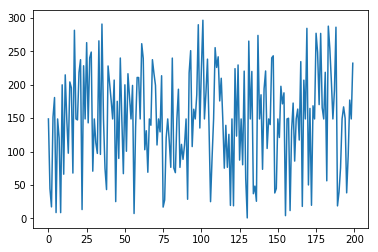

In [133]:
plt.plot(np.array(data['TV']))
plt.show()

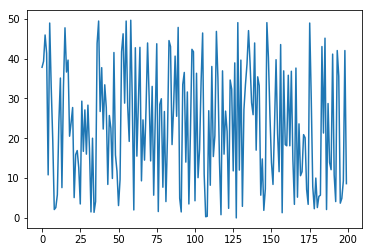

In [134]:
plt.plot(np.array(data['Radio']))
plt.show()

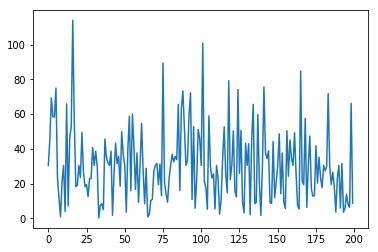

In [135]:
plt.plot(np.array(data['Newspaper']))
plt.show()

In [136]:
data = pd.concat([data,pd.get_dummies(data['Sales_Type'], prefix='SalesType')],axis=1).drop(['Sales_Type'],axis=1)

In [137]:
data

,TV,Radio,Newspaper,Sales,SalesType_High,SalesType_Low,SalesType_Medium
0,148.757831,37.8,30.492222,22.1,1,0,0
1,44.500000,39.3,45.100000,10.4,0,0,1
2,17.200000,45.9,69.300000,9.3,0,0,1
3,151.500000,41.3,58.500000,18.5,1,0,0
4,180.800000,10.8,58.400000,12.9,0,0,1
...,...,...,...,...,...,...,...
195,38.200000,3.7,13.800000,7.6,0,0,1
196,94.200000,4.9,8.100000,9.7,0,0,1
197,177.000000,9.3,6.400000,12.8,0,0,1
198,148.757831,42.0,66.200000,25.5,1,0,0


In [144]:
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data[data.columns[:3]])
data_scaled

array([[0.50070285, 0.76209677, 0.26554285],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384],
       [0.02705445, 0.9858871 , 0.65699208],
       [0.50070285, 0.66129032, 0.20404573],
       [0.4041258 , 0.39516129, 0.09938434],
       [0.02671627, 0.04233871, 0.00615655],
       [0.67331755, 0.05241935, 0.18381706],
       [0.2211701 , 0.11693548, 0.26554285],
       [0.72370646, 0.48387097, 0.03254178],
       [0.50070285, 0.70766129, 0.5769569 ],
       [0.32735881, 0.15322581, 0.06068602],
       [0.68785932, 0.66330645, 0.40193492],
       [0.65843761, 0.96169355, 0.46262093],
       [0.22691917, 0.73790323, 1.        ],
       [0.94927291, 0.7983871 , 0.48812665],
       [0.50070285, 0.41330645, 0.15831135],
       [0.49577274, 0.48185484, 0.16534741],
       [0.73621914, 0.55846774, 0.26554285],
       [0.80047345, 0.10282258, 0.20404573],
       [0.

In [145]:
X=data_scaled

In [146]:
Y=np.array(data[data.columns[3]])

In [147]:
model=LinearRegression()

In [148]:
model.fit(X,Y)

LinearRegression()

In [149]:
model.coef_

array([13.43935129,  9.49359512, -0.20628929])

In [150]:
model.intercept_

2.895354861398193

In [151]:
y_pred=model.predict(X)

In [152]:
mse=mean_squared_error(Y,y_pred)
print(f"\nMSE: {mse}")


MSE: 6.532657561887703
